#CH2 : 텐서플로우 설치와 주피터 노트북

출처 : 
https://github.com/golbin/TensorFlow-Tutorials

## 2.1 파이썬 라이브러리 설치하기

In [0]:
# !pip install --upgrade tensorflow

# !pip install numpy
# !pip install matplotlib
# !pip install pillow

## 2.3 주피터 노트북

In [2]:
import tensorflow as tf

yellow = tf.constant('Hellow, TensorFlow!')
print(yellow)

Tensor("Const:0", shape=(), dtype=string)


In [5]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)
print(c)

Tensor("Add:0", shape=(), dtype=int32)


In [1]:
sess = tf.Session()
print(sess.run(yellow))
print(sess.run([a,b,c]))

NameError: ignored

In [7]:
print(a)

Tensor("Const_1:0", shape=(), dtype=int32)


# CH3 : 텐서플로 프로그래밍 101

## 3.1 텐서와 그래프 실행

In [17]:
import tensorflow as tf

hellow = tf.constant('Hellow, TensorFlow!')
print(hellow)

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)
print(c)

sess = tf.Session()

print(sess.run(yellow))
print(sess.run([a,b,c]))

sess.close()

Tensor("Const_6:0", shape=(), dtype=string)
Tensor("Add_2:0", shape=(), dtype=int32)
Hellow, TensorFlow!
[10, 32, 42]


## 3.2 플레이스홀더와 변수

In [14]:
import tensorflow as tf

X = tf.placeholder(tf.float32, [None,3])
print(X)

x_data = [[1,2,3], [4,5,6]]

W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([2,1]))

expr = tf.matmul(X,W) + b

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("===x_data===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
print(sess.run(expr, feed_dict={X: x_data}))

sess.close()


Tensor("Placeholder_4:0", shape=(?, 3), dtype=float32)
===x_data===
[[1, 2, 3], [4, 5, 6]]
=== W ===
[[-1.5709289  -0.04569159]
 [ 0.6511053  -0.08923197]
 [ 1.1335604  -0.3956917 ]]
=== b ===
[[-0.28129753]
 [ 1.2139353 ]]
=== expr ===
[[ 2.8506653 -1.6925281]
 [ 4.9871087 -1.789141 ]]


## 3.3 선형 회귀 모형 구현하기

In [0]:
import tensorflow as tf

x_data = [1,2,3]
y_data = [4,5,6]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))


X = tf.placeholder(tf.float32, name ="X")
Y = tf.placeholder(tf.float32, name ="Y")

hypothesis = W * X + b


cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)





In [12]:
print(b)

<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [11]:
print(hypothesis)

Tensor("add_1:0", dtype=float32)


In [7]:
print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [8]:
print(optimizer)

In [9]:
train_op

<tf.Operation 'GradientDescent' type=NoOp>

#CH4 : 기본 신경망 구현

##4.3 심층 신경망 구현하기

In [0]:
import tensorflow as tf
import numpy as np


# data set 설정
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1,0,0], #기타
    [0,1,0], #포유류
    [0,0,1], #조류
    [1,0,0], #기타
    [1,0,0], #기타
    [0,0,1]  #포유류
])


# 플레이스홀더 설정
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


W1 = tf.Variable(tf.random_uniform([2,10], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([10,3], -1.0, 1.0))

b1 = tf.Variable(tf.zeros([10]))
b2 = tf.Variable(tf.zeros([3]))

L1 = tf.add(tf.matmul(X,W1), b1)
L1 = tf.nn.relr(L1)

model = tf.add(tf.matul(L1, W2), b2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labled = Y, logits =model))

optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
train_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100) :
  sess.run(train_op, feed_dict={X:x_data, Y:y_data})
  
  if (step + 1) % 10 == 0:
    print(step+1, sess.run(cost, fee_dict={X:x_data, Y:y_data}))


prediction = 







In [0]:
# 모델을 저장하고 재사용하는 방법을 익혀봅니다.

import tensorflow as tf
import numpy as np


# data set 설정
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1,0,0], #기타
    [0,1,0], #포유류
    [0,0,1], #조류
    [1,0,0], #기타
    [1,0,0], #기타
    [0,0,1]  #포유류
])



#########
# 신경망 모델 구성
######
# 학습에 직접적으로 사용하지 않고 학습 횟수에 따라 단순히 증가시킬 변수를 만듭니다.
global_step = tf.Variable(0, trainable=False, name='global_step')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_uniform([10, 20], -1., 1.))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_uniform([20, 3], -1., 1.))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
# global_step로 넘겨준 변수를, 학습용 변수들을 최적화 할 때 마다 학습 횟수를 하나씩 증가시킵니다.
train_op = optimizer.minimize(cost, global_step=global_step)



In [12]:

#########
# 신경망 모델 학습
######
sess = tf.Session()
# 모델을 저장하고 불러오는 API를 초기화합니다.
# global_variables 함수를 통해 앞서 정의하였던 변수들을 저장하거나 불러올 변수들로 설정합니다.
saver = tf.train.Saver(tf.global_variables())

ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())

# 최적화 진행
for step in range(2):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    print('Step: %d, ' % sess.run(global_step),
          'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))

# 최적화가 끝난 뒤, 변수를 저장합니다.
saver.save(sess, './model/dnn.ckpt', global_step=global_step)

#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))


INFO:tensorflow:Restoring parameters from ./model/dnn.ckpt-100


NotFoundError: ignored

# CH5

##5.1 학습 모델 저장하고 제사용하기

In [3]:
import tensorflow as tf
import numpy as np

data = np.loadtxt('https://raw.githubusercontent.com/KyoungHa-Park/TensorFlow-Tutorials/master/05%20-%20TensorBoard%2C%20Saver/data.csv', delimiter=',',unpack=True, dtype='float32')

# 털, 날개, 기타, 포유류, 조류
# x_data = 0, 1
# y_data = 2, 3, 4
x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])


#########
# 신경망 모델 구성
######
# 학습에 직접적으로 사용하지 않고 학습 횟수에 따라 단순히 증가시킬 변수를 만듭니다.
global_step = tf.Variable(0, trainable=False, name='global_step')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_uniform([10, 20], -1., 1.))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_uniform([20, 3], -1., 1.))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
# global_step로 넘겨준 변수를, 학습용 변수들을 최적화 할 때 마다 학습 횟수를 하나씩 증가시킵니다.
train_op = optimizer.minimize(cost, global_step=global_step)


#########
# 신경망 모델 학습
######
sess = tf.Session()
# 모델을 저장하고 불러오는 API를 초기화합니다.
# global_variables 함수를 통해 앞서 정의하였던 변수들을 저장하거나 불러올 변수들로 설정합니다.
saver = tf.train.Saver(tf.global_variables())

ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())

# 최적화 진행
for step in range(2):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    print('Step: %d, ' % sess.run(global_step),
          'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))

# 최적화가 끝난 뒤, 변수를 저장합니다.
saver.save(sess, './model/dnn.ckpt', global_step=global_step)

#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

('Step: 1, ', 'Cost: 0.954')
('Step: 2, ', 'Cost: 0.924')
('\xec\x98\x88\xec\xb8\xa1\xea\xb0\x92:', array([0, 2, 2, 0, 0, 2]))
('\xec\x8b\xa4\xec\xa0\x9c\xea\xb0\x92:', array([0, 1, 2, 0, 0, 2]))
정확도: 83.33


## 5.2텐서보드 사용하기

In [0]:
import tensorflow as tf
import numpy as np


# x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
# y_data = np.array([
#     [1,0,0], #기타
#     [0,1,0], #포유류
#     [0,0,1], #조류
#     [1,0,0], #기타
#     [1,0,0], #기타
#     [0,0,1]  #포유류
# ])


data = np.array([[0, 0, 1, 0, 0],
                 [1, 0, 0, 1, 0], 
                 [1, 1, 0, 0, 1], 
                 [0, 0, 1, 0, 0], 
                 [0, 0, 1, 0, 0], 
                 [0, 1, 0, 0, 1]])

# data.to_csv('data.csv', index=False)



# data = np.loadtxt('./data.csv', delimiter=',',
#                   unpack=True, dtype='float32')

# 털, 날개, 기타, 포유류, 조류
# x_data = 0, 1
# y_data = 2, 3, 4
x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])

In [0]:
#########
# 신경망 모델 구성
######
# 학습에 직접적으로 사용하지 않고 학습 횟수에 따라 단순히 증가시킬 변수를 만듭니다.
global_step = tf.Variable(0, trainable=False, name='global_step')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_uniform([10, 20], -1., 1.))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_uniform([20, 3], -1., 1.))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
# global_step로 넘겨준 변수를, 학습용 변수들을 최적화 할 때 마다 학습 횟수를 하나씩 증가시킵니다.
train_op = optimizer.minimize(cost, global_step=global_step)

In [0]:
#########
# 신경망 모델 학습
######
sess = tf.Session()
# 모델을 저장하고 불러오는 API를 초기화합니다.
# global_variables 함수를 통해 앞서 정의하였던 변수들을 저장하거나 불러올 변수들로 설정합니다.
saver = tf.train.Saver(tf.global_variables())

ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())


In [23]:
# 최적화 진행
for step in range(2):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    print('Step: %d, ' % sess.run(global_step),
          'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))

FailedPreconditionError: ignored

In [10]:
# 최적화가 끝난 뒤, 변수를 저장합니다.
saver.save(sess, './model/dnn.ckpt', global_step=global_step)

#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

('\xec\x98\x88\xec\xb8\xa1\xea\xb0\x92:', array([1, 0, 1, 1, 0]))
('\xec\x8b\xa4\xec\xa0\x9c\xea\xb0\x92:', array([0, 0, 1, 0, 0]))
정확도: 60.00


#CH6 : MNIST

## 6.1 MNIST 학습하기

+  미니배치 : 여러개를 한번에 학습할 때, 여러개의 데이터를 적당한 크기로 잘라서 진행하는 것
+  에포크 : 학습 데이터 전체를 한 바퀴 도는 것

In [5]:
# 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 10])

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 200
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost =', '0.513')
('Epoch:', '0002', 'Avg. cost =', '0.194')
('Epoch:', '0003', 'Avg. cost =', '0.129')
('Epoch:', '0004', 'Avg. cost =', '0.095')
('Epoch:', '0005', 'Avg. cost =', '0.072')
('Epoch:', '0006', 'Avg. cost =', '0.057')
('Epoch:', '0007', 'Avg. cost =', '0.044')
('Epoch:', '0008', 'Avg. cost =', '0.037')
('Epoch:', '0009', 'Avg. cost =', '0.029')
('Epoch:', '0010', 'Avg. cost =', '0.025')
('Epoch:', '0011', 'Avg. cost =', '0.019')
('Epoch:', '0012', 'Avg. cost =', '0.017')
('Epoch:', '0013', 'Avg. cost =', '0.013')
('Epoch:', '0014', 'Avg. cost =', '0.010')
('Epoch:', '0015', 'Avg. cost =', '0.009')
최적화 완료!
('\xec\xa0\x95\xed\x99\x95\xeb\x8f\x84:', 0.9791)


In [4]:
model

<tf.Tensor 'MatMul_5:0' shape=(?, 10) dtype=float32>

In [3]:
total_batch

550

In [13]:
print(mnist)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f71e022dd90>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f71e022dd50>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f71e022de50>)


##6.2 드롭아웃

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost =', '0.428')
('Epoch:', '0002', 'Avg. cost =', '0.163')
('Epoch:', '0003', 'Avg. cost =', '0.116')
('Epoch:', '0004', 'Avg. cost =', '0.091')
('Epoch:', '0005', 'Avg. cost =', '0.074')
('Epoch:', '0006', 'Avg. cost =', '0.062')
('Epoch:', '0007', 'Avg. cost =', '0.055')
('Epoch:', '0008', 'Avg. cost =', '0.049')
('Epoch:', '0009', 'Avg. cost =', '0.043')
('Epoch:', '0010', 'Avg. cost =', '0.038')
('Epoch:', '0011', 'Avg. cost =', '0.031')
('Epoch:', '0012', 'Avg. cost =', '0.033')
('Epoch:', '0013', 'Avg. cost =', '0.029')
('Epoch:', '0014', 'Avg. cost =', '0.027')
('Epoch:', '0015', 'Avg. cost =', '0.027')
('Epoch:', '0016', 'Avg. cost =', '0.024')
('Epoch:', '0017', 'Avg. cost =', '0.022')
('Epoch:', '0018', 'Avg. cost =', '0.024')
('Epoch:', '0019', 'Avg.

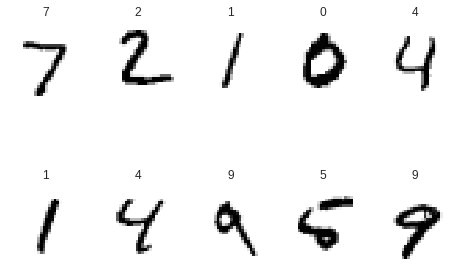

In [18]:
# 과적합 방지 기법 중 하나인 Dropout 을 사용해봅니다.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
# 1. 레이어  : 3개
# 2. 코스트  : softmax_cross_entropy_with_logits
# 3. 최적화  : AdamOptimizer
# 4. batch   : size = 100
# 5. epoch   : range = 15              --반복 횟수를 의미함
# 6. overfitting 방지 : dropout = 0.8  --L1 및 L2 layor에 이용함
######

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([
    , 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))


#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

In [24]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
batch_xs
#batch_ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
import pandas as pd

df1 = pd.DataFrame(mnist.test.images)
df1

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df2 = pd.DataFrame(mnist.test.labels)
df2

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# CH7 : CNN -  이미지 인식의 은총알

##7.1 CNN의 개념

In [25]:
# 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용하여 더 높은 인식률을 만들어봅니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# 각각의 변수와 레이어는 다음과 같은 형태로 구성됩니다.
# W1 [3 3 1 32] -> [3 3]: 커널 크기, 1: 입력값 X 의 특성수, 32: 필터 갯수
# L1 Conv shape=(?, 28, 28, 32)
#    Pool     ->(?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# tf.nn.conv2d 를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있습니다.
# padding='SAME' 은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# Pooling 역시 tf.nn.max_pool 을 이용하여 쉽게 구성할 수 있습니다.
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L1 = tf.nn.dropout(L1, keep_prob)

# L2 Conv shape=(?, 14, 14, 64)
#    Pool     ->(?, 7, 7, 64)
# W2 의 [3, 3, 32, 64] 에서 32 는 L1 에서 출력된 W1 의 마지막 차원, 필터의 크기 입니다.
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob)

# FC 레이어: 입력값 7x7x64 -> 출력값 256
# Full connect를 위해 직전의 Pool 사이즈인 (?, 7, 7, 64) 를 참고하여 차원을 줄여줍니다.
#    Reshape  ->(?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# 최적화 함수를 RMSPropOptimizer 로 바꿔서 결과를 확인해봅시다.
# optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost =', '0.347')
('Epoch:', '0002', 'Avg. cost =', '0.111')
('Epoch:', '0003', 'Avg. cost =', '0.079')
('Epoch:', '0004', 'Avg. cost =', '0.061')
('Epoch:', '0005', 'Avg. cost =', '0.052')
('Epoch:', '0006', 'Avg. cost =', '0.043')
('Epoch:', '0007', 'Avg. cost =', '0.038')
('Epoch:', '0008', 'Avg. cost =', '0.032')
('Epoch:', '0009', 'Avg. cost =', '0.030')
('Epoch:', '0010', 'Avg. cost =', '0.027')
('Epoch:', '0011', 'Avg. cost =', '0.022')
('Epoch:', '0012', 'Avg. cost =', '0.022')
('Epoch:', '0013', 'Avg. cost =', '0.019')
('Epoch:', '0014', 'Avg. cost =', '0.017')
('Epoch:', '0015', 'Avg. cost =', '0.016')
최적화 완료!
('\xec\xa0\x95\xed\x99\x95\xeb\x8f\x84:', 0.9905)


##7.2 모델 구현하기

In [35]:
# 신경망 구성을 손쉽게 해 주는 유틸리티 모음인 tensorflow.layers 를 사용해봅니다.
# 01 - CNN.py 를 재구성한 것이니, 소스를 한 번 비교해보세요.
# 이처럼 TensorFlow 에는 간단하게 사용할 수 있는 다양한 함수와 유틸리티들이 매우 많이 마련되어 있습니다.
# 다만, 처음에는 기본적인 개념에 익숙히지는 것이 좋으므로 이후에도 가급적 기본 함수들을 이용하도록 하겠습니다.
import tensorflow as tf
from datetime import datetime, timedelta

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool)

# 기본적으로 inputs, outputs size, kernel_size 만 넣어주면
# 활성화 함수 적용은 물론, 컨볼루션 신경망을 만들기 위한 나머지 수치들은 알아서 계산해줍니다.
# 특히 Weights 를 계산하는데 xavier_initializer 를 쓰고 있는 등,
# 크게 신경쓰지 않아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X, 32, [3, 3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1, [2, 2], [2, 2])
L1 = tf.layers.dropout(L1, 0.7, is_training)

L2 = tf.layers.conv2d(L1, 64, [3, 3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2, 2], [2, 2])
L2 = tf.layers.dropout(L2, 0.7, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.5, is_training)

model = tf.layers.dense(L3, 10, activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          is_training: True})
        total_cost += cost_val

    now = datetime.today()+ timedelta(hours =9)    # 현재 in google
    date = now.strftime('%Y-%m-%d')
    time = now.strftime('%H:%M:%S')
    
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch), 'Time =', date +" " + time )

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   is_training: False}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost =', '0.1854', 'Time =', '2018-03-09 23:41:16')
('Epoch:', '0002', 'Avg. cost =', '0.0536', 'Time =', '2018-03-09 23:42:03')
('Epoch:', '0003', 'Avg. cost =', '0.0367', 'Time =', '2018-03-09 23:42:50')
('Epoch:', '0004', 'Avg. cost =', '0.0263', 'Time =', '2018-03-09 23:43:38')
('Epoch:', '0005', 'Avg. cost =', '0.0194', 'Time =', '2018-03-09 23:44:24')
('Epoch:', '0006', 'Avg. cost =', '0.0149', 'Time =', '2018-03-09 23:45:12')
('Epoch:', '0007', 'Avg. cost =', '0.0120', 'Time =', '2018-03-09 23:45:59')
('Epoch:', '0008', 'Avg. cost =', '0.0105', 'Time =', '2018-03-09 23:46:46')
('Epoch:', '0009', 'Avg. cost =', '0.0071', 'Time =', '2018-03-09 23:47:33')
('Epoch:', '0010', 'Avg. cost =', '0.0077', 'Time =', '2018-03-09 23:48:20')
('Epoch:', '0011', 'Avg. cos

##7.3 고수준의 API

#CH8 : Autoencoder

##8.1 Autoencoder 개념

## 8.2 오토인코더 구현하기

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost =', '0.1869')
('Epoch:', '0002', 'Avg. cost =', '0.0485')
('Epoch:', '0003', 'Avg. cost =', '0.0391')
('Epoch:', '0004', 'Avg. cost =', '0.0348')
('Epoch:', '0005', 'Avg. cost =', '0.0324')
('Epoch:', '0006', 'Avg. cost =', '0.0305')
('Epoch:', '0007', 'Avg. cost =', '0.0294')
('Epoch:', '0008', 'Avg. cost =', '0.0285')
('Epoch:', '0009', 'Avg. cost =', '0.0278')
('Epoch:', '0010', 'Avg. cost =', '0.0264')
('Epoch:', '0011', 'Avg. cost =', '0.0258')
('Epoch:', '0012', 'Avg. cost =', '0.0254')
('Epoch:', '0013', 'Avg. cost =', '0.0250')
('Epoch:', '0014', 'Avg. cost =', '0.0248')
('Epoch:', '0015', 'Avg. cost =', '0.0245')
('Epoch:', '0016', 'Avg. cost =', '0.0242')
('Epoch:', '0017', 'Avg. cost =', '0.0240')
('Epoch:', '0018', 'Avg. cost =', '0.0236')
('Epoc

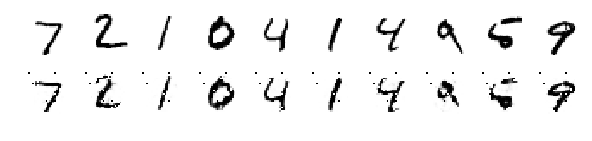

In [2]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

최적화 완료!_v2
모델링 시작시간 : 2018-03-11 23:15
모델링 종료시간 : 2018-03-11 23:17


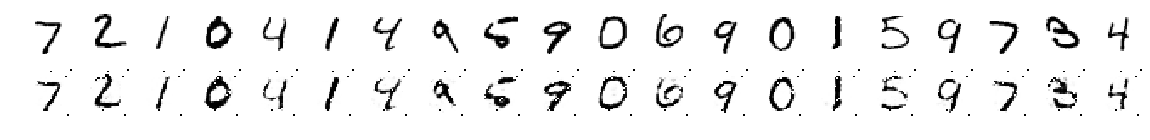

In [9]:
import time
from datetime import datetime, timedelta

#########
# 신경망 모델 학습_v2
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

now1 = datetime.today()+ timedelta(hours =9)    # 현재 in google
date1 = now1.strftime('%Y-%m-%d')
time1 = now1.strftime('%H:%M')


for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

now2 = datetime.today()+ timedelta(hours =9)    # 현재 in google
date2 = now2.strftime('%Y-%m-%d')
time2 = now2.strftime('%H:%M')

print('최적화 완료!_v2')
print("모델링 시작시간 : ") + date1 + " " + time1
print("모델링 종료시간 : ") + date2 + " " + time2

sample_size = 20

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()